# Vocabulary visualizations per region

In [1]:
using Pkg
Pkg.activate("..")

VALID_CC = ["AR", "BO", "BR", "CA", "CL", "CO", "CR", "CU", "DO", "EC", "ES", "FR", "GB", "GQ", "GT", "HN", "MX", "NI", "PA", "PE", "PR", "PY", "SV", "US", "UY", "VE"]
vocpath = "../data/SpanishLang/voc"
DATA = "../data/SpanishLang/"

using Plots, StatsBase, JLD2, CSV, DataFrames, LinearAlgebra, TextSearch, Formatting, Latexify,
    SimilaritySearch, SimSearchManifoldLearning

  Activating project at `~/Research/RegionalSpanish`
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1662


In [2]:
V = Dict{String,Dict{UInt64,Float64}}()
F = Dict()

for cc in VALID_CC
    filename = joinpath(vocpath, cc * ".jld2")
    #D_ = CSV.read(filename, DataFrame, delim='\t')
    M = load(filename, "model")
    V[cc] = Dict(hash(t) => n / trainsize(M) for (t, n) in zip(token(M), ndocs(M)))
    #V[cc] = Dict{UInt64,Float64}(hash(t) => w for (t, w) in zip(token(M), ndocs(M)))
    F[cc] = Dict(t => n for (t, n) in zip(token(M), ndocs(M)))
end

for (cc, X) in V
    println(cc => length(X))
end

"SV" => 73407
"US" => 290631
"ES" => 567617
"BR" => 125785
"EC" => 146726
"GQ" => 1110
"FR" => 69216
"HN" => 60193
"MX" => 435915
"PR" => 22858
"CO" => 322982
"DO" => 108063
"CA" => 62645
"GB" => 81686
"GT" => 94744
"CR" => 102446
"BO" => 46655
"PE" => 177080
"PY" => 123447
"UY" => 199000
"AR" => 669745
"CL" => 281290
"PA" => 111065
"VE" => 270561
"CU" => 18496
"NI" => 68230


# top-20 most popular tokens by region

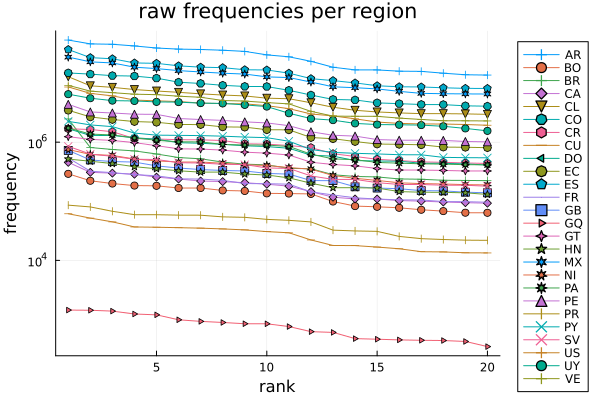

| region |    1 |    2 |     3 |    4 |   5 |   6 |     7 |   8 |   9 |  10 |  11 |    12 |    13 |  14 |    15 |    16 |  17 |    18 |    19 |   20 |
| ------:| ----:| ----:| -----:| ----:| ---:| ---:| -----:| ---:| ---:| ---:| ---:| -----:| -----:| ---:| -----:| -----:| ---:| -----:| -----:| ----:|
|     AR |  que | _usr |    de |    , |   a |   y |    la |  no |  me |  el |   . |    en |    se |  lo |    es |    un | con |    mi |     0 |   te |
|     BO | _usr |   de |   que |    . |   , |  la |     y |  el |   a |  en |  no | _htag |    es | los |    se |   por |  un |     0 |   con |   lo |
|     BR | _usr |   de |     , |  que |   a |  no | _htag |   . |  me |   0 |  la |     y |    el |  en |    te |     ! | por |     o |    se |    ? |
|     CA | _usr |  que |    de |    . |   , |   y |    la |   a |  no |  el |  en |    es |    se | los |    me |    lo |  un |   por |     0 |  con |
|     CL | _usr |   de |   que |    , |  la |   y |     . |   a |  el |  no |  en | _htag |    es |  se |   los |    me |  un |    .. |   con |  por |
|     CO | _usr |  que |    de |    . |   , |   y |    la |   a |  no |  el |  en |    es |    me |  se |   por |    lo | los |   con | _htag |   un |
|     CR | _usr |  que |    de |    , |   y |   . |     a |  la |  no |  el |  en |    me |    es |  se |    un |     0 |  lo |   con |   por |   mi |
|     CU | _usr |   de | _htag |   la |   , |  en |     . |   y | que |  el |   a |    no |    es | los |     0 |   por |  se |    un |   con | para |
|     DO | _usr |  que |    de |    . |   , |   y |    la |  el |   a |  en |  no |    es | _htag |  se |   los |     0 | por |    un |    lo |  con |
|     EC | _usr |   de |   que |    . |   , |  la |     y |   a |  el |  en |  no |    es | _htag |  se |   los |     0 | por |   con |    lo |   un |
|     ES | _usr |  que |    de |    , |   . |   y |     a |  la |  no |  el |  en |    es |    me |  lo |    se |    un |   0 |   por | _htag |  los |
|     FR | _usr |   de |   que |    . |   , |   y |    la |   a |  no |  en |  el |    es |    me |  un |     0 |    se |  lo |   los | _htag |  por |
|     GB | _usr |  que |    de |    . |   , |   y |     a |  la |  no |  el |  en |    me |    es |  lo |    un |    se |   0 |   por |   los |  con |
|     GQ | _usr |    . |   que |   de |   , |  la |     a |  el |  no |   y |  en | _htag |    es | los |    lo |   por |  un |    se |    me |    ? |
|     GT | _usr |  que |    de |    . |   , |   y |    la |   a |  no |  el |  en |    es |    me |  se | _htag |    lo | por |    .. |   los |    0 |
|     HN | _usr |  que |    de |    . |   , |   y |    la |   a |  el |  no |  en |    es | _htag |  me |    se |     0 |  lo |   por |   los |  con |
|     MX | _usr |  que |    de |    , |   . |   y |     a |  la |  no |  el |  en |    me | _htag |  es |    se |   por |  mi |    un |   con |    0 |
|     NI |  que |   de |  _usr |    , |   a |   y |    la |  no |   . |  me |  el |    en |    es |  se |    mi | _htag |  lo |     0 |   por |  con |
|     PA | _usr |   de |   que |    . |   y |  la |     , |   a |  el |  no |  en |    es |    se | los |    me |    lo |   0 |   por |   con |   un |
|     PE | _usr |   de |   que |    , |   . |   y |    la |   a |  no |  el |  en |    es | _htag |  se |    me |   los | por |    lo |   con |    0 |
|     PR | _usr |  que |    de |    . |   y |   a |     , |  la |  no |  en |  el |    me |    es |   0 |    se |    lo |  yo |   con |   los |   un |
|     PY | _usr |  que |    de |    , |   a |   y |    la |   . |  no |  el |  en |    es |    se |  me | _htag |   por |   0 |    un |    lo |  con |
|     SV | _usr |   de |   que |    , |   . |  la |     y |  el |   a |  no |  en |    es |   los |  se |   por |     0 |  lo | _htag |   con |   un |
|     US | _usr |  que |    de |    . |   y |   , |     a |  la |  no |  el |  en |    me |    es |  se |    lo |   los |  un |   por |     0 |  con |
|     UY |  que |   de |     , | _usr |   y |   a |    la |  no |  me |  el |  en |     . |    se |  es |    lo |    un | con |     0 |   los | jaja |
|     VE | _usr |   de |   que |    . |   , |   y |    la |   a |  el |  no |  en |    es |    se | los |     0 | _htag | por |   con |    lo |   me |


In [3]:
k = 20
display("text/markdown", """# top-$k most popular tokens by region""")
plot()
table = Matrix{String}(undef, length(VALID_CC) + 1, k+1)
header = ["region"]
for i in 1:k
    push!(header, string(i))
end

table[1, :] .= header
for (i, cc) in enumerate(VALID_CC)
    voc = collect(F[cc])
    sort!(voc, by=p -> p[end], rev=true)
    resize!(voc, k)
    # display("text/markdown", "$cc: " * join(first.(voc), ", "))
    table[i+1, 1] = cc
    table[i+1, 2:end] .= first.(voc)
    plot!(last.(voc), label=cc, m=:auto)
    #display("text/markdown", "    freqs: " * join(format.(Int.(last.(voc)), autoscale=:metric, precision=1), ", "))
end
# display(latexify(table))

plot!(title="raw frequencies per region", yscale=:log10, ylabel="frequency", xlabel="rank", legend=:outertopright, fmt=:png) |> display
display("text/markdown", latexify(table, latex=false, env=:mdtable))

In [4]:
n = length(VALID_CC)
A = Matrix{Float64}(undef, n, n)
dist = CosineDistance()
@time for (i, cc) in enumerate(VALID_CC)
    u = V[cc]
    A[i, i] = 0.0
    for j in i+1:n
        v = V[VALID_CC[j]]
        A[j, i] = A[i, j] = evaluate(dist, u, v)        
    end
end

A

  1.861232 seconds (67.82 k allocations: 3.413 MiB, 3.74% compilation time)


26×26 Matrix{Float64}:
 0.0         0.0519814   0.188853   …  0.0221266   0.00382391  0.0342409
 0.0519814   0.0         0.137157      0.0191423   0.0651191   0.00945421
 0.188853    0.137157    0.0           0.13105     0.21569     0.148919
 0.0363345   0.0132705   0.120035      0.00460599  0.0498169   0.00690248
 0.037364    0.00729325  0.120858      0.011771    0.0490817   0.00935022
 0.0251519   0.0169255   0.169987   …  0.00867117  0.0362628   0.00670256
 0.0173834   0.0275545   0.161939      0.00878654  0.0244304   0.0179643
 0.0911596   0.0199472   0.147845      0.0521212   0.104174    0.0346612
 0.0422174   0.00725621  0.14372       0.0100182   0.0539256   0.00468236
 0.0382179   0.00570844  0.13526       0.00946141  0.0502273   0.00410717
 0.0304233   0.0149991   0.120928   …  0.00532479  0.0423539   0.00895874
 0.0460202   0.0173153   0.0930782     0.00952673  0.0614349   0.0138929
 0.0340392   0.0200696   0.117011      0.00525343  0.0478418   0.0117099
 0.0451278   0.0176139

In [17]:
function creatergb!(C)
    for i in (1, 2, 3)
        v = @view C[i, :]
        #s = 4 * std(v)
        min_, max_ = extrema(v)
        #v .= v ./ s .+ 0.5

        for j in eachindex(v)
            x = (v[j] - min_) / (max_ - min_)
            #x = v[j]
            v[j] = clamp(x, 0.05, 0.95)
        end
    end

    [RGB(c...) for c in eachcol(C)]
end

creatergb! (generic function with 1 method)

  0.000209 seconds (3 allocations: 1.047 KiB)
  0.000017 seconds (3 allocations: 1.047 KiB)


┌ Info: ======= k=4 =====
└ @ Main In[18]:9
*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 4.0391e-5
- embedding init: 0.000465123
- embedding opt: 0.009092662

*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 3.2834e-5
- embedding init: 0.00055864
- embedding opt: 0.00673812



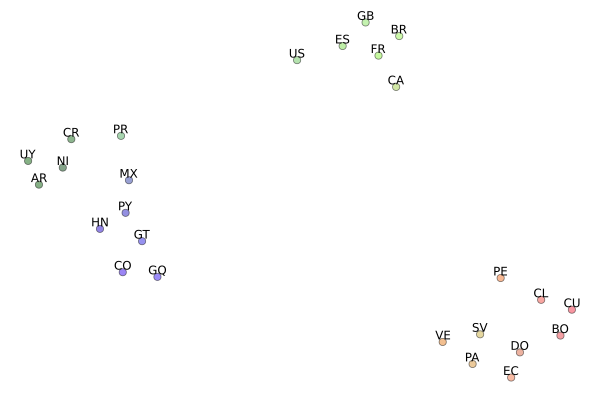

  0.000187 seconds (3 allocations: 1.516 KiB)
  0.000008 seconds (3 allocations: 1.516 KiB)


┌ Info: ======= k=6 =====
└ @ Main In[18]:9
*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 3.6796e-5
- embedding init: 0.00032965
- embedding opt: 0.020083433

*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 3.612e-5
- embedding init: 0.000319708
- embedding opt: 0.045093992



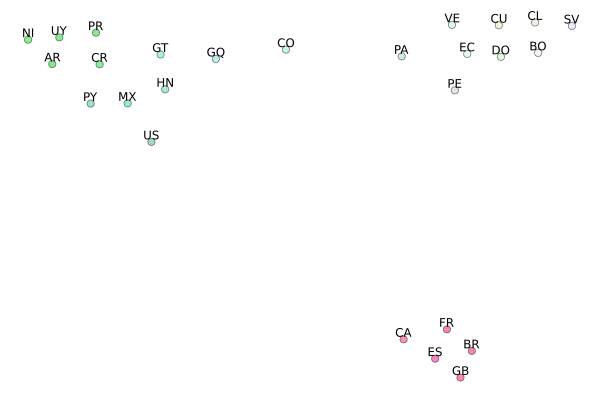

  0.000192 seconds (3 allocations: 1.828 KiB)
  0.000010 seconds (3 allocations: 1.828 KiB)


┌ Info: ======= k=8 =====
└ @ Main In[18]:9
*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 4.3747e-5
- embedding init: 0.000308965
- embedding opt: 0.034446075

*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 4.5658e-5
- embedding init: 0.000334301
- embedding opt: 0.010270349



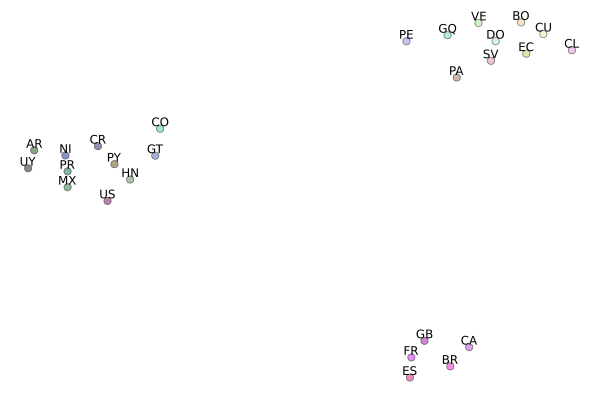

  0.000197 seconds (3 allocations: 2.359 KiB)
  0.000010 seconds (3 allocations: 2.359 KiB)


┌ Info: ======= k=10 =====
└ @ Main In[18]:9
*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 5.1229e-5
- embedding init: 0.000314018
- embedding opt: 0.064958209

*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 4.8886e-5
- embedding init: 0.000303396
- embedding opt: 0.022183306



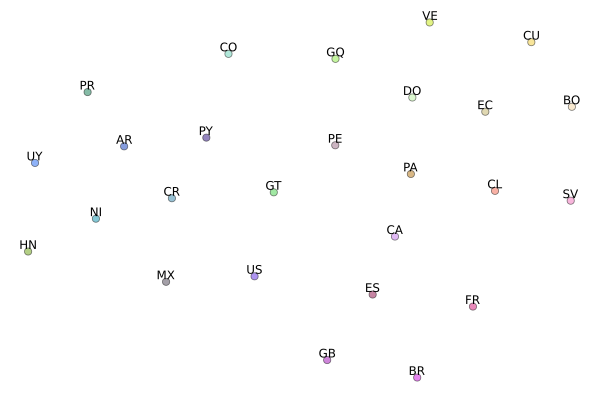

  0.000192 seconds (3 allocations: 2.734 KiB)
  0.000010 seconds (3 allocations: 2.734 KiB)


┌ Info: ======= k=12 =====
└ @ Main In[18]:9
*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 5.5257e-5
- embedding init: 0.000288623
- embedding opt: 0.011746439

*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 5.1364e-5
- embedding init: 0.000267807
- embedding opt: 0.023617661



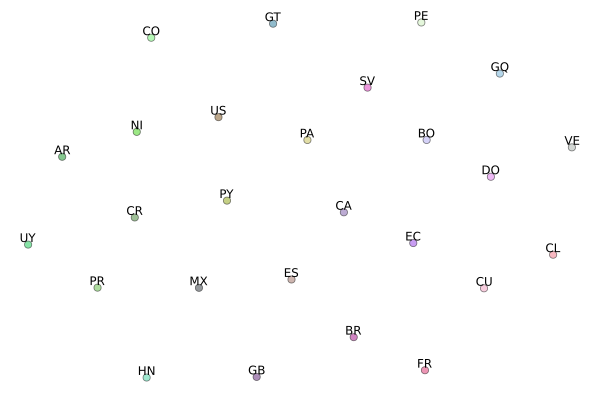

In [18]:
min_dist = 0.2
neg_sample_rate = 5
local_connectivity = 1
n_epochs = 300
layout = SpectralLayout()
tol = 1e-5

for k in 4:2:12
    @info "======= k=$k ====="
    #I = ExhaustiveSearch(db=MatrixDatabase(A), dist=L2Distance())
    I = PrecomputedAffinityMatrix(A)
    E = fit(UMAP, I; maxoutdim=2, k, min_dist, layout, n_epochs, neg_sample_rate, local_connectivity, tol)
    X = predict(E)
    E = fit(UMAP, I; maxoutdim=3, k, min_dist, layout, n_epochs, neg_sample_rate, local_connectivity, tol)
    C = creatergb!(predict(E))
    #X = predict(fit(E, 2; n_epochs, tol, neg_sample_rate))
    
    scatter(X[1, :], X[2, :], c=C, label="", series_annotations=text.(VALID_CC, :bottom, 8),
        xticks=nothing, yticks=nothing, xaxis=false, yaxis=false,
        ms=4, ma=0.5, la=0.5, alpha=0.5)
    savefig("../figs/fig-voc-lexical-umap-$k.pdf")
    savefig("../figs/fig-voc-lexical-umap-$k.png")
    plot!(fmt=:png) |> display
    
    open(joinpath(DATA, "colormap-common-voc-lexical-$k.csv"), "w") do f
        println(f, "country,R,G,B")
        for (i, (cc, c)) in enumerate(zip(VALID_CC, C))
            println(f, cc, ",", c.r, ",", c.g, ",", c.b)
        end
    end
end


# Spanish language vocabulary visualization (UMAP) per region

2d and 3d projections, for spatial distribution and 3d to color distributions, respectively.
It computes UMAP using 3NN and cosine distance with raw vocabularies/emojis.



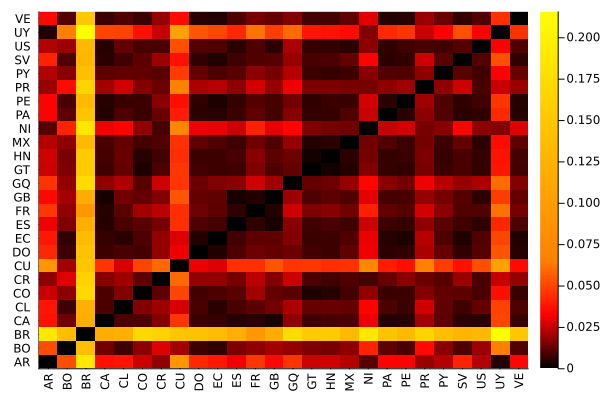

In [16]:
heatmap(VALID_CC, VALID_CC, A, ticks = :all, xrot=90, c=cgrad([:black, :red, :yellow], [0.07, 0.15, 0.3]))
savefig("../figs/fig-common-words-lexical-affinity-matrix.pdf")
savefig("../figs/fig-common-words-lexical-affinity-matrix.png")
plot!(fmt=:png)